<a href="https://colab.research.google.com/github/Nehakumari1023/Activity-/blob/main/ML%20Project_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ML Project- Part A: Airbnb Price Prediction and Insights**

Loading & initial EDA

In [ ]:
# import gradles
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Try importing XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

In [ ]:
# Load dataset
df = pd.read_csv('airbnb_data.csv')

In [ ]:
df.shape

(74111, 29)

In [ ]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
# Summary statistics of the dataset
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


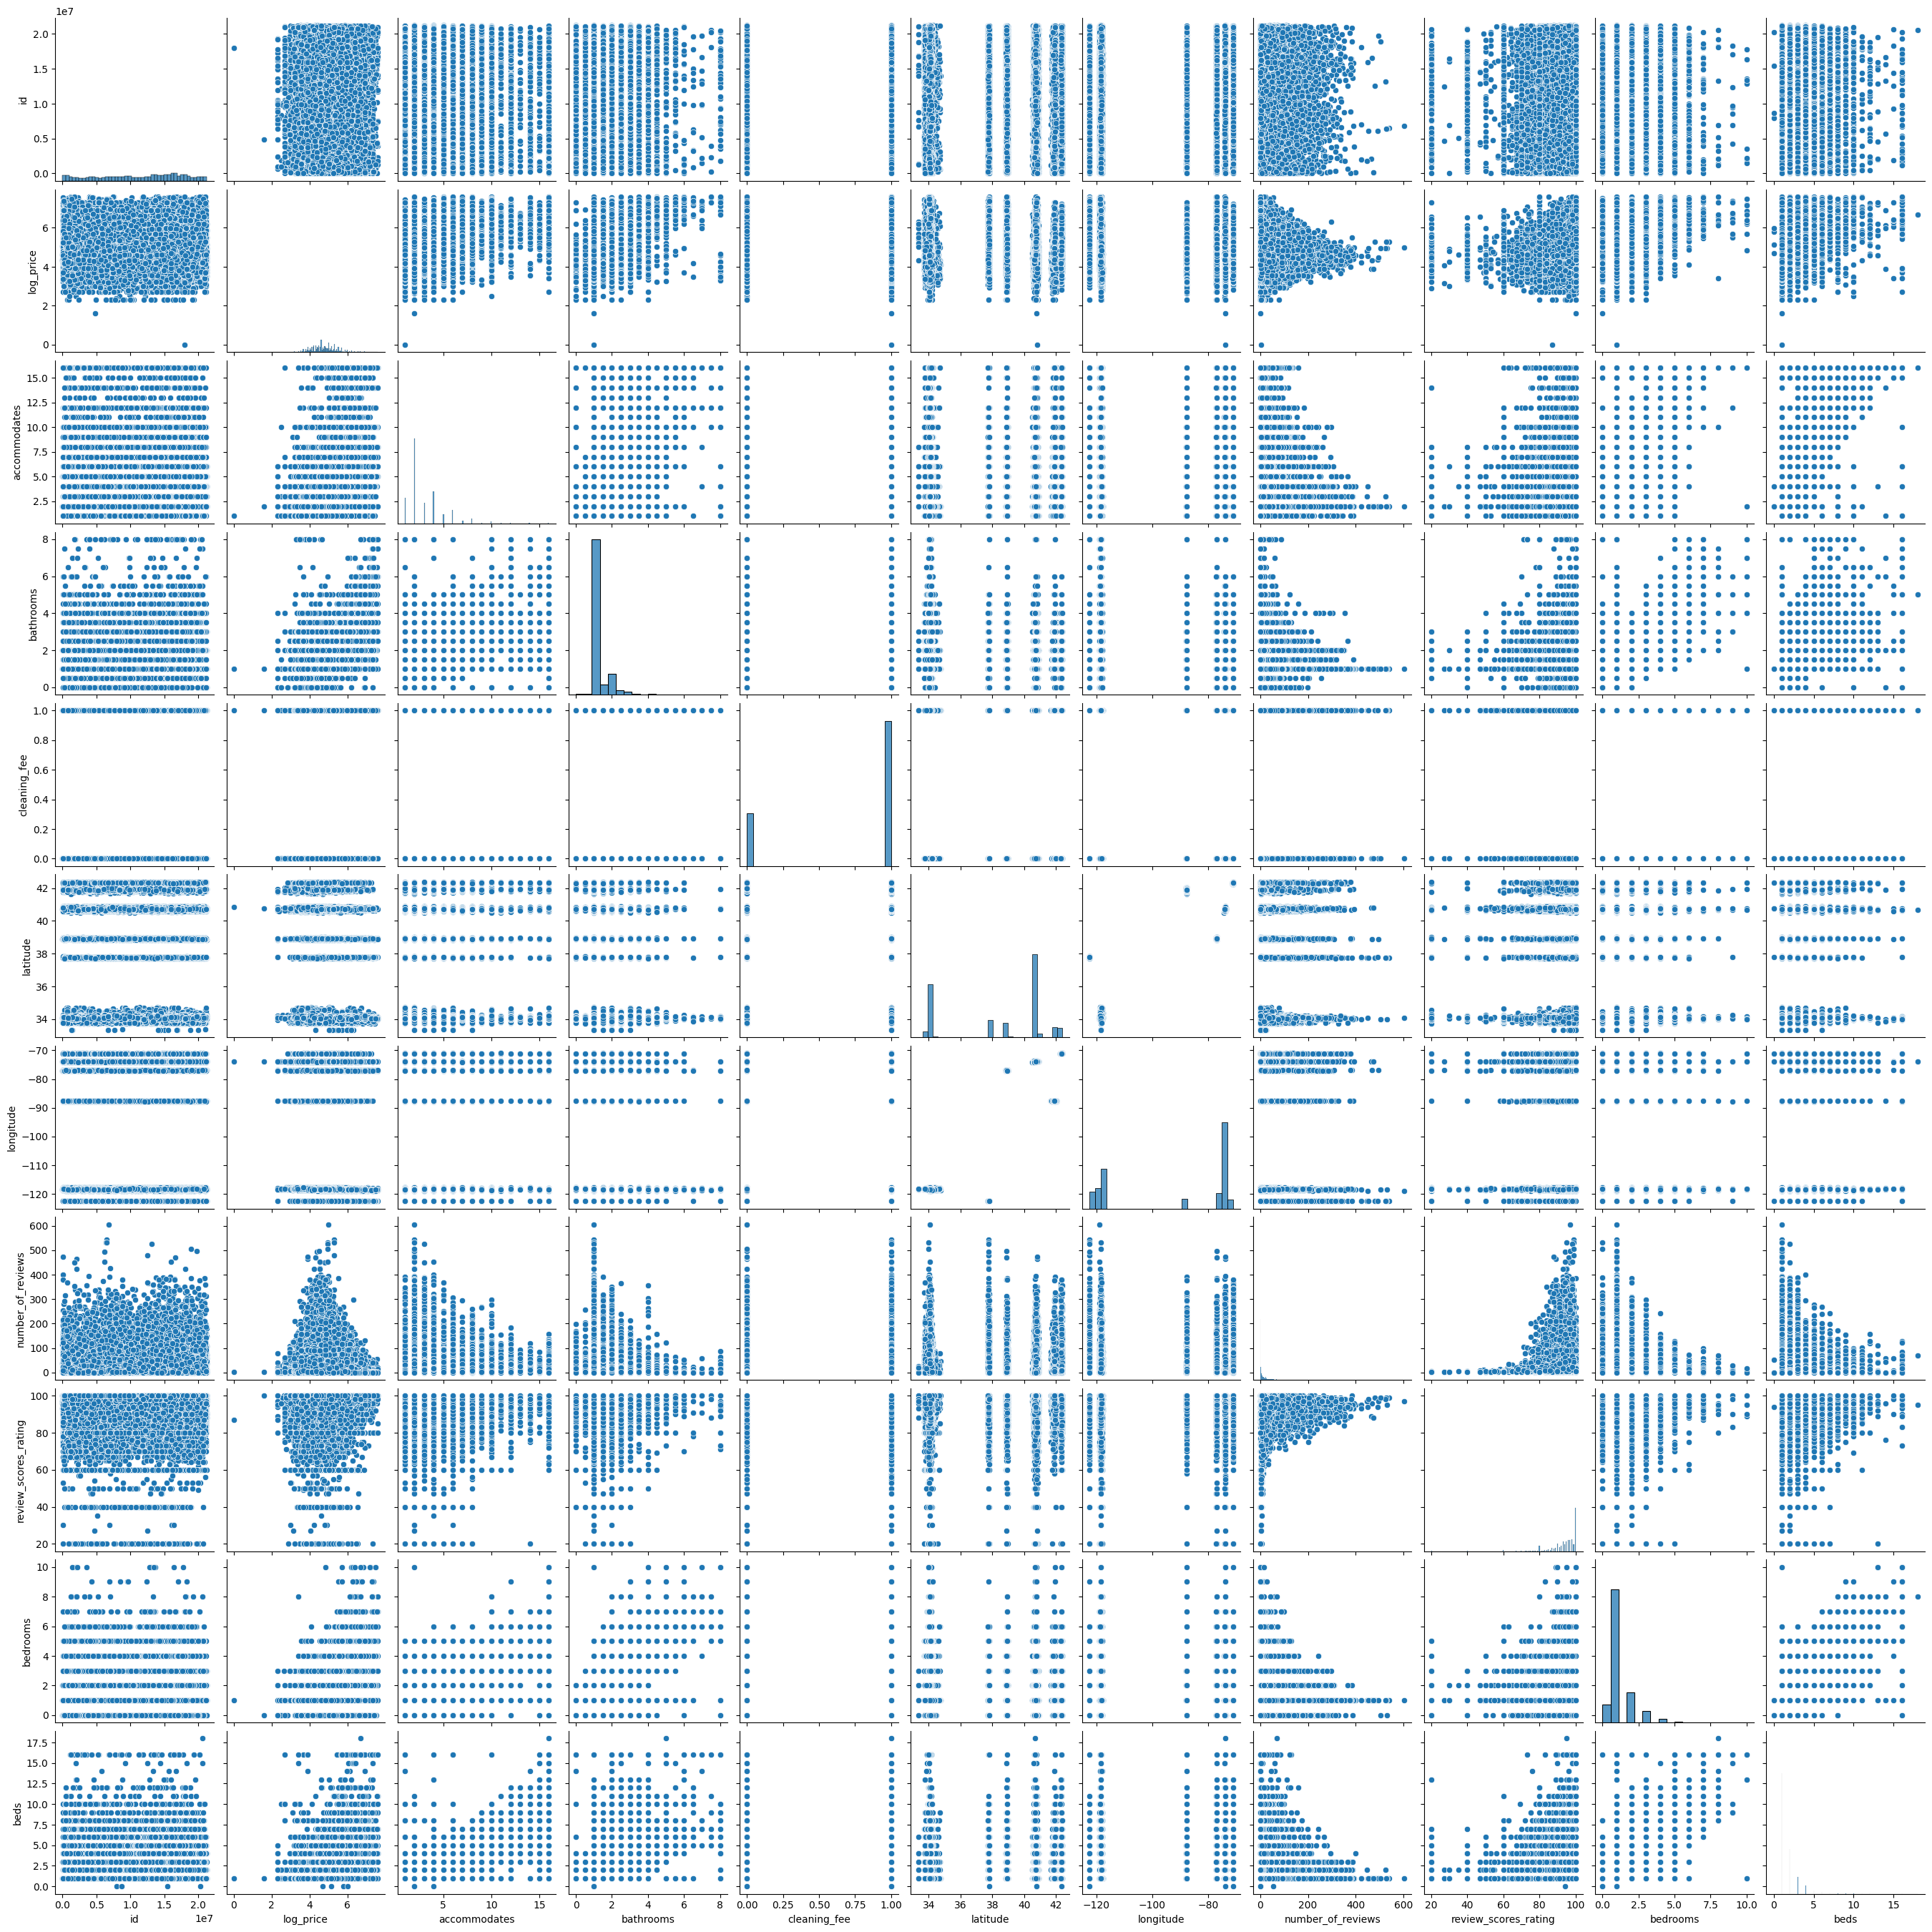

In [ ]:
# PairPlot to visualize relationships between variables
sns.pairplot(df)
plt.show()

In [ ]:
# missing value summary
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing>0].head(30)

,0
host_response_rate,0.246913
review_scores_rating,0.225635
first_review,0.214057
last_review,0.213558
thumbnail_url,0.110861
neighbourhood,0.092726
zipcode,0.013061
bathrooms,0.002699
host_identity_verified,0.002537
host_has_profile_pic,0.002537


In [ ]:
# Data Cleaning & Feature Engineering

bool_cols = ['cleaning_fee','instant_bookable','host_has_profile_pic','host_identity_verified']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].map({True:1, False:0, 't':1, 'f':0, 'true':1, 'false':0, 'TRUE':1, 'FALSE':0})
        # Parse host response rate
if 'host_response_rate' in df.columns:
    df['host_response_rate_num'] = pd.to_numeric(df['host_response_rate'].astype(str).str.replace('%',''), errors='coerce')

# Count amenities
if 'amenities' in df.columns:
    df['amenities_count'] = df['amenities'].fillna('').apply(lambda x: len([a for a in x.split(',') if a.strip()]))

# Parse dates
for col in ['host_since','last_review']:
    if col in df.columns:
        df[col+'_dt'] = pd.to_datetime(df[col], errors='coerce')

if 'host_since_dt' in df.columns:
    df['host_tenure_days'] = (pd.Timestamp.today() - df['host_since_dt']).dt.days
if 'last_review_dt' in df.columns:
    df['days_since_last_review'] = (pd.Timestamp.today() - df['last_review_dt']).dt.days

# Target variable: log_price
if 'log_price' not in df.columns and 'price' in df.columns:
    df['log_price'] = np.log(pd.to_numeric(df['price'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce'))

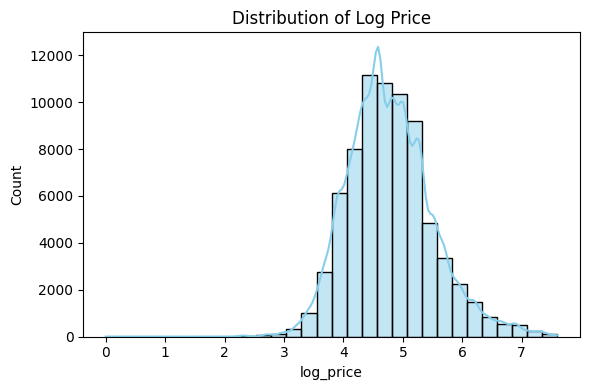

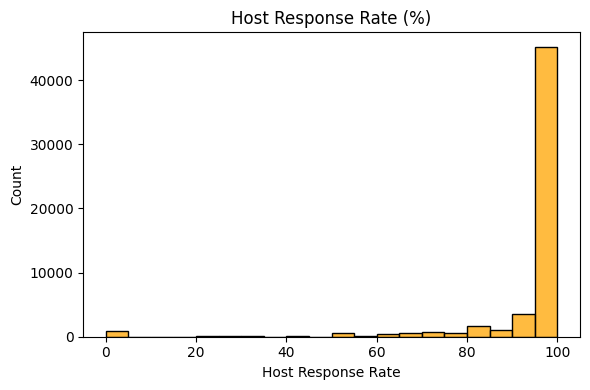

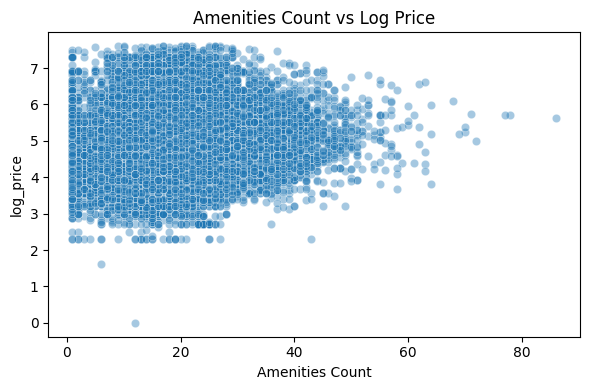

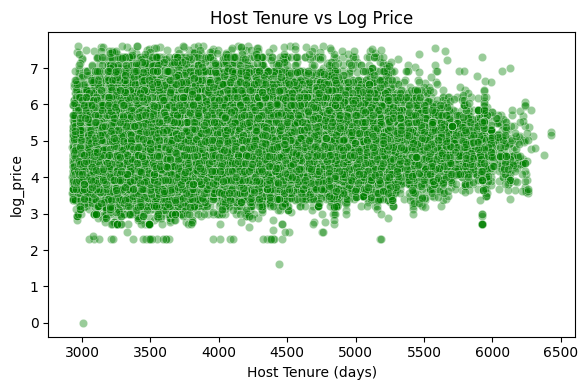

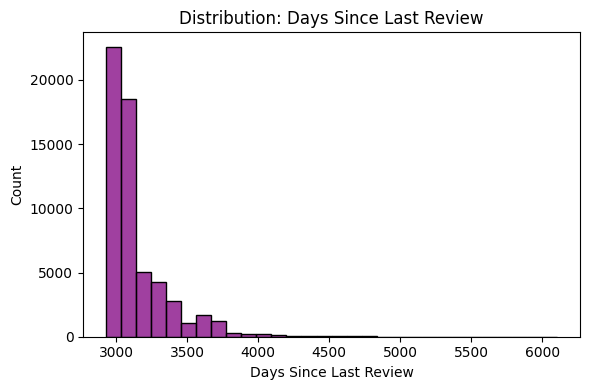

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of target variable (log_price)
plt.figure(figsize=(6,4))
sns.histplot(df['log_price'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Distribution of Log Price")
plt.xlabel("log_price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Distribution of host response rate
if 'host_response_rate_num' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['host_response_rate_num'].dropna(), kde=False, bins=20, color='orange')
    plt.title("Host Response Rate (%)")
    plt.xlabel("Host Response Rate")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 3. Amenities count vs log_price
if 'amenities_count' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='amenities_count', y='log_price', data=df, alpha=0.4)
    plt.title("Amenities Count vs Log Price")
    plt.xlabel("Amenities Count")
    plt.ylabel("log_price")
    plt.tight_layout()
    plt.show()

# 4. Host tenure vs log_price
if 'host_tenure_days' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='host_tenure_days', y='log_price', data=df, alpha=0.4, color='green')
    plt.title("Host Tenure vs Log Price")
    plt.xlabel("Host Tenure (days)")
    plt.ylabel("log_price")
    plt.tight_layout()
    plt.show()

# 5. Days since last review distribution
if 'days_since_last_review' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['days_since_last_review'].dropna(), bins=30, color='purple')
    plt.title("Distribution: Days Since Last Review")
    plt.xlabel("Days Since Last Review")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
# Select features
numeric_features = [c for c in ['accommodates','bathrooms','bedrooms','beds','number_of_reviews','review_scores_rating',
                                'amenities_count','host_response_rate_num','host_tenure_days','days_since_last_review','latitude','longitude'] if c in df.columns]
categorical_features = [c for c in ['property_type','room_type','neighbourhood','city','cancellation_policy','bed_type'] if c in df.columns]

# Reduce neighbourhood categories
if 'neighbourhood' in df.columns:
    top_nb = df['neighbourhood'].value_counts().nlargest(15).index
    df['neighbourhood'] = df['neighbourhood'].apply(lambda x: x if x in top_nb else 'Other')

X = df[numeric_features + categorical_features].copy()
y = df['log_price']

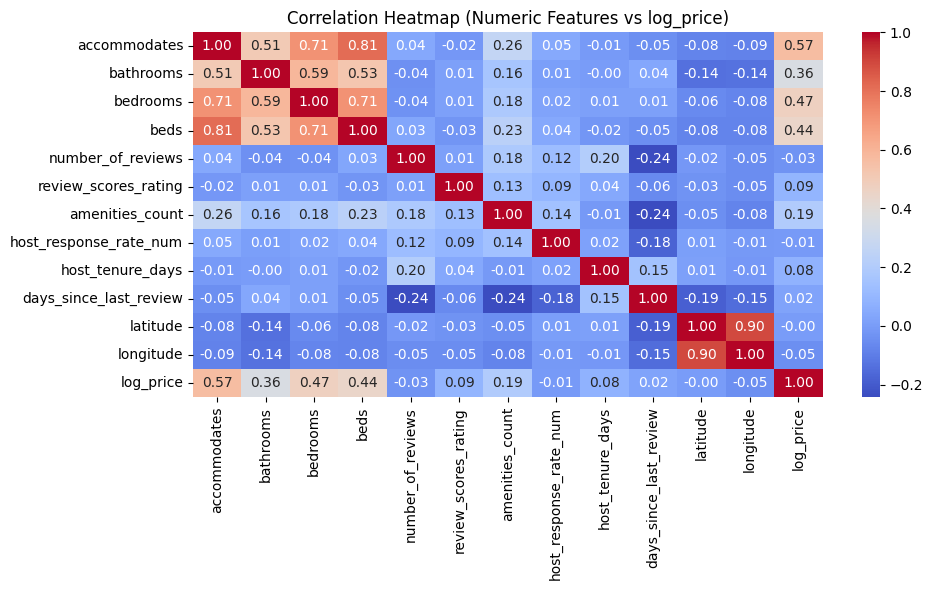

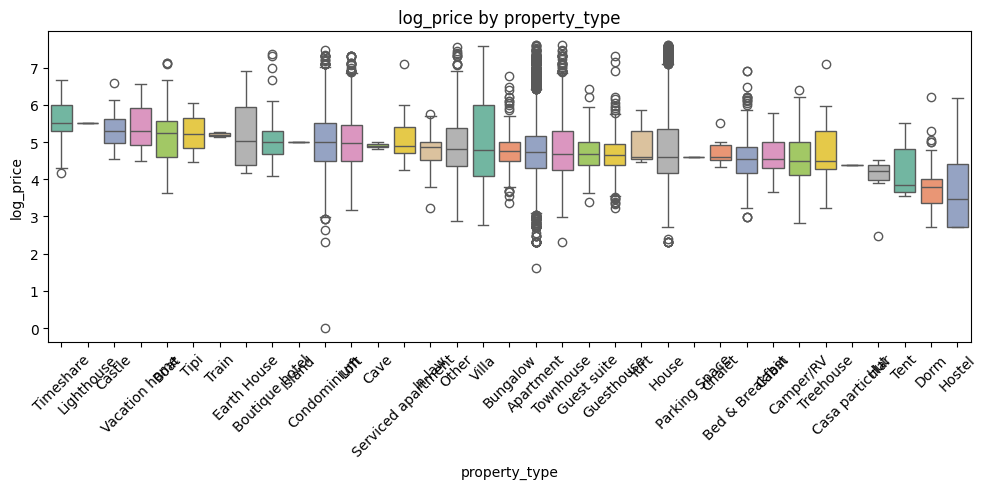

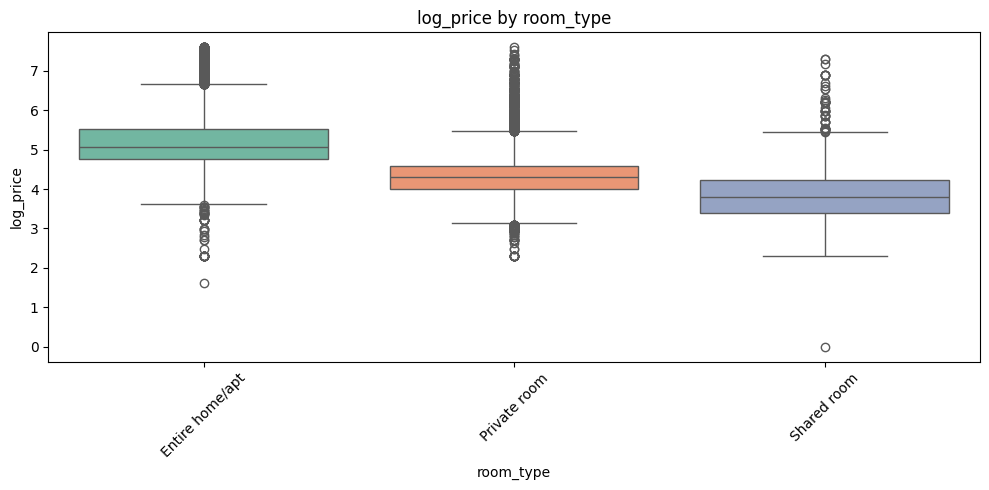

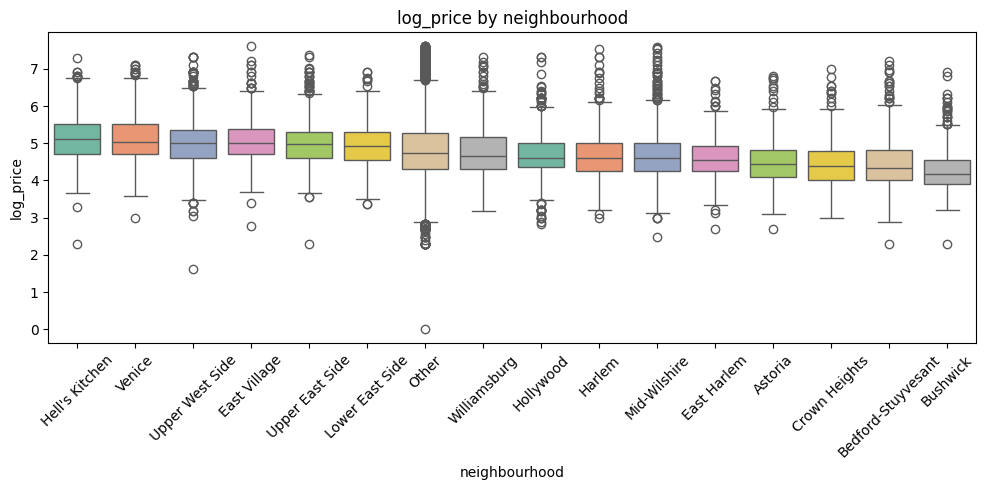

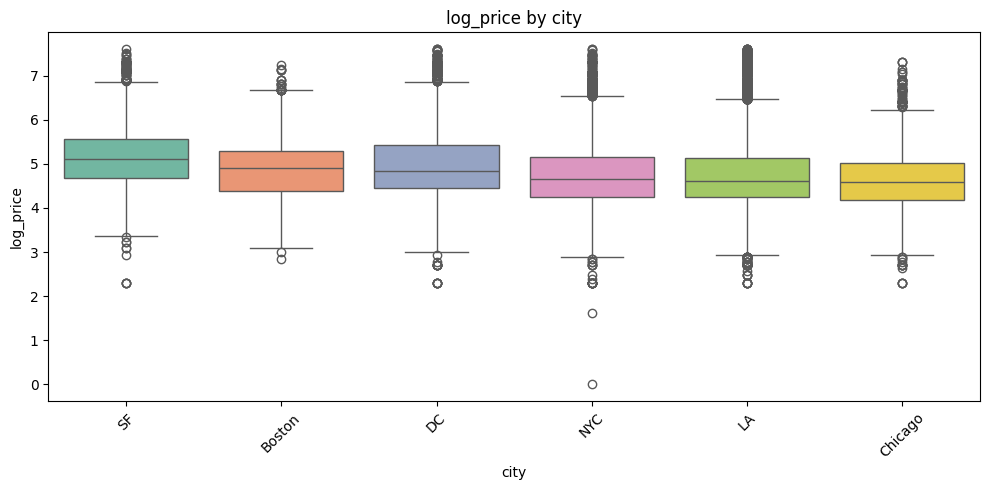

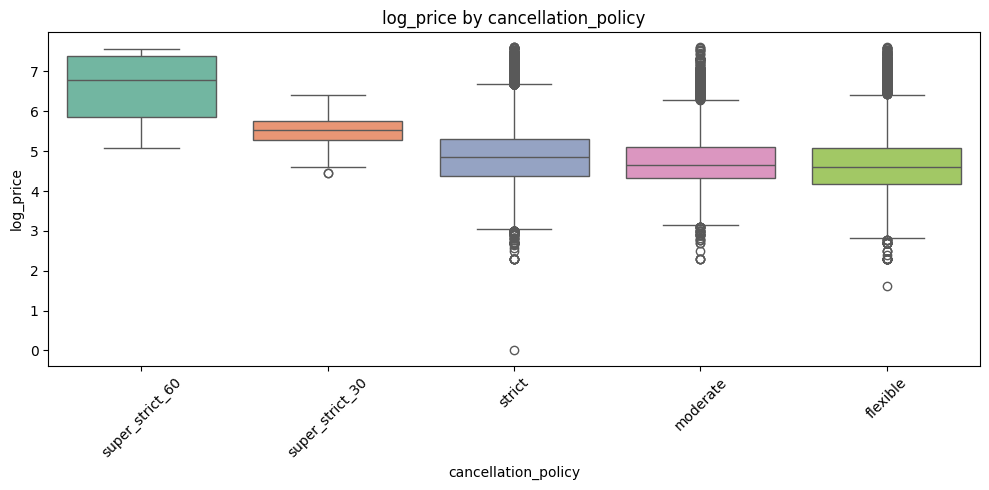

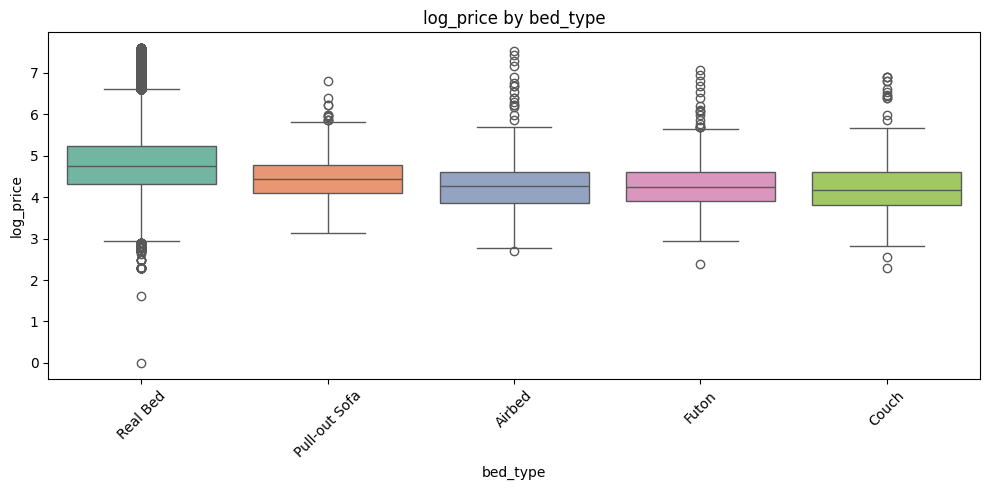

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
corr = df[numeric_features + ['log_price']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features vs log_price)")
plt.tight_layout()
plt.show()

# Boxplots for categorical features vs log_price
for col in categorical_features:
    plt.figure(figsize=(10,5))
    order = df.groupby(col)['log_price'].median().sort_values(ascending=False).index
    sns.boxplot(x=col, y='log_price', data=df, order=order, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"log_price by {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Train/Validation/Test split
np.random.seed(42)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17647, random_state=42)

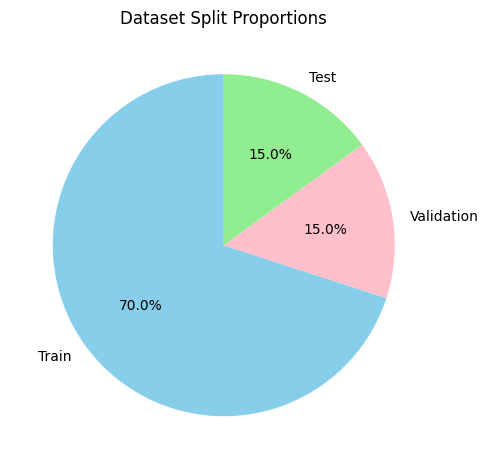

In [ ]:
import matplotlib.pyplot as plt

# Sizes
sizes = [len(X_train), len(X_val), len(X_test)]
labels = ["Train", "Validation", "Test"]
plt.figure(figsize=(5,5))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["skyblue","pink","lightgreen"], startangle=90)
plt.title("Dataset Split Proportions")
plt.tight_layout()
plt.show()

In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Model training
if xgb_available:
    model = XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=6, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'amenities_count',
                                                   'host_response_rate_num',
                                                   'host_tenure_days',
                                                   'days_since_last_review',
                                                   'latitude', '...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
# Evaluation
y_val_pred = pipeline.predict(X_val)
y_test_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import math

def evaluate(y_true, y_pred, label):
    """
    Compute evaluation metrics:
    - RMSE
    - MAE
    - R^2
    """
    # Compute MSE
    mse = mean_squared_error(y_true, y_pred)
    # RMSE: sqrt(MSE)
    rmse = math.sqrt(mse)

    # Old/new compatibility: if you’re using a version that supports squared=False,
    # you can uncomment the next line and set rmse directly:
    # rmse = mean_squared_error(y_true, y_pred, squared=False)

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{label} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

evaluate(y_val, y_val_pred, "Validation (log_price)")
evaluate(y_test, y_test_pred, "Test (log_price)")

# Convert to price scale
y_test_price = np.exp(y_test)
y_test_pred_price = np.exp(y_test_pred)

evaluate(y_test_price, y_test_pred_price, "Test (price)")

Validation (log_price) → RMSE: 0.3883, MAE: 0.2790, R²: 0.7104
Test (log_price) → RMSE: 0.3905, MAE: 0.2825, R²: 0.7033
Test (price) → RMSE: 116.1392, MAE: 50.9214, R²: 0.5397


In [ ]:
# Feature importance
try:
    ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    cat_names = list(ohe.get_feature_names_out(categorical_features))
    feature_names = numeric_features + cat_names
    importances = pipeline.named_steps['model'].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    print("\nTop 10 Important Features:\n", fi.head(10))
except:
    print("Feature importances not available for this model.")


Top 10 Important Features:
 room_type_Private room    0.321339
room_type_Shared room     0.152023
bedrooms                  0.093280
city_SF                   0.069674
accommodates              0.049131
bathrooms                 0.025676
city_DC                   0.023334
city_LA                   0.016719
city_Chicago              0.015255
longitude                 0.014715
dtype: float32


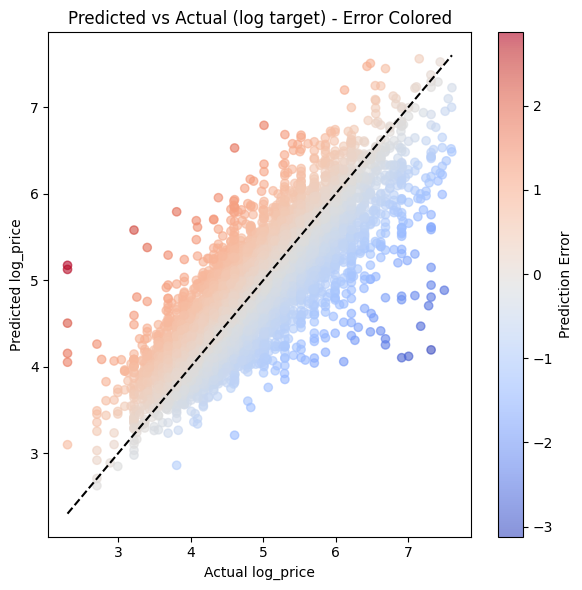

In [ ]:
# Plot - Predicted vs Actual
errors = y_test_pred - y_test  # residuals
plt.figure(figsize=(6,6))
sc = plt.scatter(y_test, y_test_pred, c=errors, cmap='coolwarm', alpha=0.6)
plt.colorbar(sc, label="Prediction Error")
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title('Predicted vs Actual (log target) - Error Colored')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.tight_layout()
plt.show()